In [3]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# フォルダの中にある画像を順次読み込む
# カテゴリーは0から始める

X = []
Y = []

# 対象Aの画像
for picture in list_pictures('./data/train/carot'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(0)


# 対象Bの画像
for picture in list_pictures('./data/train/onion'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(1)


# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [5]:
# 画素値を0から1の範囲に変換
X = X.astype('float32')
X = X / 255.0

# クラスの形式を変換
Y = np_utils.to_categorical(Y, 2)

# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [6]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=5, epochs=200,
                   validation_data = (X_test, y_test), verbose = 1)



Train on 73 samples, validate on 37 samples
Epoch 1/200

73/73 [==============================] - ETA: 0s - loss: 0.7195 - acc: 0.5479 - val_loss: 0.6928 - val_acc: 0.5676
Epoch 2/200

73/73 [==============================] - ETA: 0s - loss: 0.6996 - acc: 0.4795 - val_loss: 0.6936 - val_acc: 0.4865
Epoch 3/200

73/73 [==============================] - ETA: 0s - loss: 0.6923 - acc: 0.5068 - val_loss: 0.6817 - val_acc: 0.5946
Epoch 4/200

73/73 [==============================] - ETA: 0s - loss: 0.6627 - acc: 0.6712 - val_loss: 0.6754 - val_acc: 0.5676
Epoch 5/200

73/73 [==============================] - ETA: 0s - loss: 0.6591 - acc: 0.6164 - val_loss: 0.6682 - val_acc: 0.6757
Epoch 6/200

73/73 [==============================] - ETA: 0s - loss: 0.6111 - acc: 0.6301 - val_loss: 0.6550 - val_acc: 0.5946
Epoch 7/200

50/73 [===================>..........] - ETA: 1s - loss: 0.6107 - acc: 0.6600


73/73 [==============================] - ETA: 0s - loss: 0.5884 - acc: 0.6849 - val_loss: 0.6695 - val_acc: 0.5405
Epoch 8/200

73/73 [==============================] - ETA: 0s - loss: 0.5468 - acc: 0.7123 - val_loss: 0.6487 - val_acc: 0.5135
Epoch 9/200

73/73 [==============================] - ETA: 0s - loss: 0.5274 - acc: 0.7397 - val_loss: 0.6338 - val_acc: 0.5405
Epoch 10/200

73/73 [==============================] - ETA: 0s - loss: 0.5238 - acc: 0.7671 - val_loss: 0.6506 - val_acc: 0.5405
Epoch 11/200

73/73 [==============================] - ETA: 0s - loss: 0.4561 - acc: 0.8493 - val_loss: 0.5865 - val_acc: 0.5676
Epoch 12/200

73/73 [==============================] - ETA: 0s - loss: 0.4192 - acc: 0.8767 - val_loss: 0.5658 - val_acc: 0.7027
Epoch 13/200

73/73 [==============================] - ETA: 0s - loss: 0.3667 - acc: 0.8630 - val_loss: 0.5769 - val_acc: 0.6216
Epoch 14/200

25/73 [=========>....................] - ETA: 2s - loss: 0.2646 - acc: 0.8800


73/73 [==============================] - ETA: 0s - loss: 0.4327 - acc: 0.7945 - val_loss: 0.5396 - val_acc: 0.7297
Epoch 15/200

73/73 [==============================] - ETA: 0s - loss: 0.3630 - acc: 0.8630 - val_loss: 0.4975 - val_acc: 0.7027
Epoch 16/200

73/73 [==============================] - ETA: 0s - loss: 0.4236 - acc: 0.8356 - val_loss: 0.6483 - val_acc: 0.6757
Epoch 17/200

73/73 [==============================] - ETA: 0s - loss: 0.5716 - acc: 0.7260 - val_loss: 0.5937 - val_acc: 0.7027
Epoch 18/200

73/73 [==============================] - ETA: 0s - loss: 0.3578 - acc: 0.8219 - val_loss: 0.5611 - val_acc: 0.6486
Epoch 19/200

73/73 [==============================] - ETA: 0s - loss: 0.3580 - acc: 0.8630 - val_loss: 0.4616 - val_acc: 0.7568
Epoch 20/200

73/73 [==============================] - ETA: 0s - loss: 0.4674 - acc: 0.8630 - val_loss: 0.5538 - val_acc: 0.7027
Epoch 21/200



73/73 [==============================] - ETA: 0s - loss: 0.2966 - acc: 0.8767 - val_loss: 0.3934 - val_acc: 0.8919
Epoch 22/200

73/73 [==============================] - ETA: 0s - loss: 0.2576 - acc: 0.8904 - val_loss: 0.3964 - val_acc: 0.8378
Epoch 23/200

73/73 [==============================] - ETA: 0s - loss: 0.5478 - acc: 0.8356 - val_loss: 0.6978 - val_acc: 0.5135
Epoch 24/200

73/73 [==============================] - ETA: 0s - loss: 0.5173 - acc: 0.7534 - val_loss: 0.3889 - val_acc: 0.8378
Epoch 25/200

73/73 [==============================] - ETA: 0s - loss: 0.2819 - acc: 0.9041 - val_loss: 0.3410 - val_acc: 0.8919
Epoch 26/200

73/73 [==============================] - ETA: 0s - loss: 0.5290 - acc: 0.8219 - val_loss: 0.6669 - val_acc: 0.6216
Epoch 27/200

55/73 [=====================>........] - ETA: 0s - loss: 0.4088 - acc: 0.8545


73/73 [==============================] - ETA: 0s - loss: 0.4424 - acc: 0.8356 - val_loss: 0.5836 - val_acc: 0.6486
Epoch 28/200

73/73 [==============================] - ETA: 0s - loss: 0.2697 - acc: 0.9452 - val_loss: 0.4389 - val_acc: 0.8108
Epoch 29/200

73/73 [==============================] - ETA: 0s - loss: 0.3477 - acc: 0.8356 - val_loss: 0.4790 - val_acc: 0.7838
Epoch 30/200

73/73 [==============================] - ETA: 0s - loss: 0.2137 - acc: 0.9452 - val_loss: 0.4382 - val_acc: 0.7297
Epoch 31/200

73/73 [==============================] - ETA: 0s - loss: 0.2468 - acc: 0.8904 - val_loss: 0.4483 - val_acc: 0.7568
Epoch 32/200

73/73 [==============================] - ETA: 0s - loss: 0.2228 - acc: 0.9178 - val_loss: 0.8576 - val_acc: 0.6486
Epoch 33/200

73/73 [==============================] - ETA: 0s - loss: 0.2450 - acc: 0.8904 - val_loss: 0.2889 - val_acc: 0.8919
Epoch 34/200

30/73 [===========>..................] - ETA: 1s - loss: 0.2188 - acc: 0.9333


73/73 [==============================] - ETA: 0s - loss: 0.1931 - acc: 0.9315 - val_loss: 0.4675 - val_acc: 0.7838
Epoch 35/200

73/73 [==============================] - ETA: 0s - loss: 0.1822 - acc: 0.9315 - val_loss: 1.4946 - val_acc: 0.5946
Epoch 36/200

73/73 [==============================] - ETA: 0s - loss: 0.4502 - acc: 0.8630 - val_loss: 0.4289 - val_acc: 0.7297
Epoch 37/200

73/73 [==============================] - ETA: 0s - loss: 0.2633 - acc: 0.8904 - val_loss: 0.3753 - val_acc: 0.8378
Epoch 38/200

73/73 [==============================] - ETA: 0s - loss: 0.2693 - acc: 0.9315 - val_loss: 0.4189 - val_acc: 0.8649
Epoch 39/200

73/73 [==============================] - ETA: 0s - loss: 0.3119 - acc: 0.8904 - val_loss: 0.3241 - val_acc: 0.8649
Epoch 40/200

73/73 [==============================] - ETA: 0s - loss: 0.1986 - acc: 0.9452 - val_loss: 0.5228 - val_acc: 0.7568
Epoch 41/200

 5/73 [=>............................] - ETA: 3s - loss: 0.5587 - acc: 0.8000


73/73 [==============================] - ETA: 0s - loss: 0.2342 - acc: 0.9041 - val_loss: 0.4184 - val_acc: 0.7838
Epoch 42/200

73/73 [==============================] - ETA: 0s - loss: 0.1660 - acc: 0.9315 - val_loss: 0.4481 - val_acc: 0.7027
Epoch 43/200

73/73 [==============================] - ETA: 0s - loss: 0.1568 - acc: 0.9315 - val_loss: 0.3993 - val_acc: 0.8108
Epoch 44/200

73/73 [==============================] - ETA: 0s - loss: 0.1461 - acc: 0.9452 - val_loss: 0.2782 - val_acc: 0.8919
Epoch 45/200

73/73 [==============================] - ETA: 0s - loss: 0.1344 - acc: 0.9452 - val_loss: 0.3059 - val_acc: 0.8919
Epoch 46/200

73/73 [==============================] - ETA: 0s - loss: 0.2526 - acc: 0.8904 - val_loss: 0.4237 - val_acc: 0.7838
Epoch 47/200

60/73 [=======================>......] - ETA: 0s - loss: 0.2238 - acc: 0.9167


73/73 [==============================] - ETA: 0s - loss: 0.1906 - acc: 0.9315 - val_loss: 0.3098 - val_acc: 0.8919
Epoch 48/200

73/73 [==============================] - ETA: 0s - loss: 0.1195 - acc: 0.9726 - val_loss: 1.1513 - val_acc: 0.6216
Epoch 49/200

73/73 [==============================] - ETA: 0s - loss: 0.3721 - acc: 0.8767 - val_loss: 0.4665 - val_acc: 0.7838
Epoch 50/200

73/73 [==============================] - ETA: 0s - loss: 0.1460 - acc: 0.9726 - val_loss: 0.3785 - val_acc: 0.8649
Epoch 51/200

73/73 [==============================] - ETA: 0s - loss: 0.0715 - acc: 0.9726 - val_loss: 0.3331 - val_acc: 0.8919
Epoch 52/200

73/73 [==============================] - ETA: 0s - loss: 0.1963 - acc: 0.9726 - val_loss: 0.3270 - val_acc: 0.8649
Epoch 53/200

73/73 [==============================] - ETA: 0s - loss: 0.0914 - acc: 0.9726 - val_loss: 0.2598 - val_acc: 0.8649
Epoch 54/200

35/73 [=============>................] - ETA: 1s - loss: 0.0823 - acc: 0.9429


73/73 [==============================] - ETA: 0s - loss: 0.0623 - acc: 0.9726 - val_loss: 0.2689 - val_acc: 0.8919
Epoch 55/200

73/73 [==============================] - ETA: 0s - loss: 0.3562 - acc: 0.9178 - val_loss: 0.3587 - val_acc: 0.8108
Epoch 56/200

73/73 [==============================] - ETA: 0s - loss: 0.0661 - acc: 1.0000 - val_loss: 0.4454 - val_acc: 0.8378
Epoch 57/200

73/73 [==============================] - ETA: 0s - loss: 0.1103 - acc: 0.9726 - val_loss: 0.3351 - val_acc: 0.8649
Epoch 58/200

73/73 [==============================] - ETA: 0s - loss: 0.0432 - acc: 0.9863 - val_loss: 0.4405 - val_acc: 0.8649
Epoch 59/200

73/73 [==============================] - ETA: 0s - loss: 0.0959 - acc: 0.9589 - val_loss: 0.2530 - val_acc: 0.8649
Epoch 60/200

73/73 [==============================] - ETA: 0s - loss: 0.0905 - acc: 0.9589 - val_loss: 1.1228 - val_acc: 0.6486
Epoch 61/200

10/73 [===>..........................] - ETA: 2s - loss: 0.0385 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0892 - acc: 0.9726 - val_loss: 0.4055 - val_acc: 0.8378
Epoch 62/200

73/73 [==============================] - ETA: 0s - loss: 0.0782 - acc: 0.9726 - val_loss: 0.4452 - val_acc: 0.8649
Epoch 63/200

73/73 [==============================] - ETA: 0s - loss: 0.0557 - acc: 0.9726 - val_loss: 0.4009 - val_acc: 0.8649
Epoch 64/200

73/73 [==============================] - ETA: 0s - loss: 0.0220 - acc: 1.0000 - val_loss: 0.3913 - val_acc: 0.8649
Epoch 65/200

73/73 [==============================] - ETA: 0s - loss: 0.0287 - acc: 1.0000 - val_loss: 1.1222 - val_acc: 0.6757
Epoch 66/200

73/73 [==============================] - ETA: 0s - loss: 0.0710 - acc: 0.9863 - val_loss: 0.3784 - val_acc: 0.8649
Epoch 67/200

65/73 [=========================>....] - ETA: 0s - loss: 0.0418 - acc: 0.9846


73/73 [==============================] - ETA: 0s - loss: 0.0403 - acc: 0.9863 - val_loss: 0.2863 - val_acc: 0.8919
Epoch 68/200

73/73 [==============================] - ETA: 0s - loss: 0.0153 - acc: 1.0000 - val_loss: 0.4612 - val_acc: 0.8649
Epoch 69/200

73/73 [==============================] - ETA: 0s - loss: 0.0496 - acc: 0.9863 - val_loss: 0.3755 - val_acc: 0.8649
Epoch 70/200

73/73 [==============================] - ETA: 0s - loss: 0.2433 - acc: 0.9178 - val_loss: 1.2753 - val_acc: 0.6486
Epoch 71/200

73/73 [==============================] - ETA: 0s - loss: 0.0656 - acc: 0.9726 - val_loss: 0.4102 - val_acc: 0.8649
Epoch 72/200

73/73 [==============================] - ETA: 0s - loss: 0.0236 - acc: 1.0000 - val_loss: 0.4691 - val_acc: 0.8649
Epoch 73/200

73/73 [==============================] - ETA: 0s - loss: 0.0171 - acc: 1.0000 - val_loss: 0.5007 - val_acc: 0.8649
Epoch 74/200

40/73 [===============>..............] - ETA: 2s - loss: 0.0117 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.4685 - val_acc: 0.8649
Epoch 75/200

73/73 [==============================] - ETA: 0s - loss: 0.0145 - acc: 1.0000 - val_loss: 0.9225 - val_acc: 0.7568
Epoch 76/200

73/73 [==============================] - ETA: 0s - loss: 0.3024 - acc: 0.9041 - val_loss: 0.7573 - val_acc: 0.7297
Epoch 77/200

73/73 [==============================] - ETA: 0s - loss: 0.0570 - acc: 0.9863 - val_loss: 0.3841 - val_acc: 0.8919
Epoch 78/200

73/73 [==============================] - ETA: 0s - loss: 0.0161 - acc: 1.0000 - val_loss: 0.4326 - val_acc: 0.8649
Epoch 79/200

73/73 [==============================] - ETA: 0s - loss: 0.0335 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.8378
Epoch 80/200

73/73 [==============================] - ETA: 0s - loss: 0.0816 - acc: 0.9726 - val_loss: 0.3992 - val_acc: 0.8378
Epoch 81/200

15/73 [=====>........................] - ETA: 2s - loss: 0.0379 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0249 - acc: 1.0000 - val_loss: 0.3948 - val_acc: 0.8649
Epoch 82/200

73/73 [==============================] - ETA: 0s - loss: 0.0165 - acc: 1.0000 - val_loss: 0.4734 - val_acc: 0.8649
Epoch 83/200

73/73 [==============================] - ETA: 0s - loss: 0.0153 - acc: 1.0000 - val_loss: 0.3606 - val_acc: 0.8649
Epoch 84/200

73/73 [==============================] - ETA: 0s - loss: 0.0069 - acc: 1.0000 - val_loss: 0.3703 - val_acc: 0.8649
Epoch 85/200

73/73 [==============================] - ETA: 0s - loss: 0.0293 - acc: 0.9726 - val_loss: 0.6659 - val_acc: 0.8108
Epoch 86/200

73/73 [==============================] - ETA: 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.3804 - val_acc: 0.8919
Epoch 87/200

73/73 [==============================] - ETA: 0s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.3414 - val_acc: 0.8919


Epoch 88/200

73/73 [==============================] - ETA: 0s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.3858 - val_acc: 0.8919
Epoch 89/200

73/73 [==============================] - ETA: 0s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4000 - val_acc: 0.8919
Epoch 90/200

73/73 [==============================] - ETA: 0s - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4638 - val_acc: 0.8919
Epoch 91/200

73/73 [==============================] - ETA: 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4466 - val_acc: 0.8919
Epoch 92/200

73/73 [==============================] - ETA: 0s - loss: 0.0233 - acc: 1.0000 - val_loss: 0.4225 - val_acc: 0.8919
Epoch 93/200

73/73 [==============================] - ETA: 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.5208 - val_acc: 0.8378
Epoch 94/200

50/73 [===================>..........] - ETA: 1s - loss: 0.0084 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0078 - acc: 1.0000 - val_loss: 0.4150 - val_acc: 0.8919
Epoch 95/200

73/73 [==============================] - ETA: 0s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.4629 - val_acc: 0.8919
Epoch 96/200

73/73 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.4788 - val_acc: 0.8919
Epoch 97/200

73/73 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.4909 - val_acc: 0.8919
Epoch 98/200

73/73 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4908 - val_acc: 0.8919
Epoch 99/200

73/73 [==============================] - ETA: 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.6319 - val_acc: 0.8649
Epoch 100/200

73/73 [==============================] - ETA: 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4980 - val_acc: 0.8919
Epoch 101/200

25/73 [=========>....................] - ETA: 2s - loss: 0.0017 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4649 - val_acc: 0.8919
Epoch 102/200

73/73 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4003 - val_acc: 0.8919
Epoch 103/200

73/73 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4264 - val_acc: 0.8919
Epoch 104/200

73/73 [==============================] - ETA: 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.5747 - val_acc: 0.8919
Epoch 105/200

73/73 [==============================] - ETA: 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3836 - val_acc: 0.8649
Epoch 106/200

73/73 [==============================] - ETA: 0s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.5710 - val_acc: 0.8919
Epoch 107/200

73/73 [==============================] - ETA: 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5115 - val_acc: 0.8919


Epoch 108/200

73/73 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4365 - val_acc: 0.8919
Epoch 109/200

73/73 [==============================] - ETA: 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.5554 - val_acc: 0.8919
Epoch 110/200

73/73 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.4780 - val_acc: 0.8919
Epoch 111/200

73/73 [==============================] - ETA: 0s - loss: 0.3080 - acc: 0.9041 - val_loss: 0.7127 - val_acc: 0.7838
Epoch 112/200

73/73 [==============================] - ETA: 0s - loss: 0.0356 - acc: 0.9863 - val_loss: 0.3655 - val_acc: 0.8649
Epoch 113/200

73/73 [==============================] - ETA: 0s - loss: 0.1718 - acc: 0.9315 - val_loss: 0.2858 - val_acc: 0.8919
Epoch 114/200

45/73 [=================>............] - ETA: 1s - loss: 0.0283 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0279 - acc: 1.0000 - val_loss: 0.3486 - val_acc: 0.8378
Epoch 115/200

73/73 [==============================] - ETA: 0s - loss: 0.1693 - acc: 0.9178 - val_loss: 0.9148 - val_acc: 0.7838
Epoch 116/200

73/73 [==============================] - ETA: 0s - loss: 0.4704 - acc: 0.8356 - val_loss: 0.3642 - val_acc: 0.8378
Epoch 117/200

73/73 [==============================] - ETA: 0s - loss: 0.0603 - acc: 0.9863 - val_loss: 0.3684 - val_acc: 0.8378
Epoch 118/200

73/73 [==============================] - ETA: 0s - loss: 0.0398 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.8649
Epoch 119/200

73/73 [==============================] - ETA: 0s - loss: 0.0130 - acc: 1.0000 - val_loss: 0.3430 - val_acc: 0.8919
Epoch 120/200

73/73 [==============================] - ETA: 0s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.3276 - val_acc: 0.8108
Epoch 121/200

20/73 [=======>......................] - ETA: 2s - loss: 0.0068 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3542 - val_acc: 0.8919
Epoch 122/200

73/73 [==============================] - ETA: 0s - loss: 0.0132 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 0.8649
Epoch 123/200

73/73 [==============================] - ETA: 0s - loss: 0.0061 - acc: 1.0000 - val_loss: 0.3726 - val_acc: 0.8919
Epoch 124/200

73/73 [==============================] - ETA: 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.3845 - val_acc: 0.8919
Epoch 125/200

73/73 [==============================] - ETA: 0s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4294 - val_acc: 0.8919
Epoch 126/200

73/73 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.0000 - val_loss: 0.4274 - val_acc: 0.8919
Epoch 127/200

73/73 [==============================] - ETA: 0s - loss: 0.0143 - acc: 1.0000 - val_loss: 0.3562 - val_acc: 0.8919


Epoch 128/200

73/73 [==============================] - ETA: 0s - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3564 - val_acc: 0.8919
Epoch 129/200

73/73 [==============================] - ETA: 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.8919
Epoch 130/200

73/73 [==============================] - ETA: 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3926 - val_acc: 0.8919
Epoch 131/200

73/73 [==============================] - ETA: 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4081 - val_acc: 0.8919
Epoch 132/200

73/73 [==============================] - ETA: 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3742 - val_acc: 0.8919
Epoch 133/200

73/73 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3891 - val_acc: 0.8919
Epoch 134/200

50/73 [===================>..........] - ETA: 0s - loss: 0.0021 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.4181 - val_acc: 0.8919
Epoch 135/200

73/73 [==============================] - ETA: 0s - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4051 - val_acc: 0.8919
Epoch 136/200

73/73 [==============================] - ETA: 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4348 - val_acc: 0.8919
Epoch 137/200

73/73 [==============================] - ETA: 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4543 - val_acc: 0.8919
Epoch 138/200

73/73 [==============================] - ETA: 0s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.4737 - val_acc: 0.8919
Epoch 139/200

73/73 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4774 - val_acc: 0.8919
Epoch 140/200

73/73 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4655 - val_acc: 0.8919
Epoch 141/200

20/73 [=======>......................] - ETA: 2s - loss: 0.0017 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4525 - val_acc: 0.8919
Epoch 142/200

73/73 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4361 - val_acc: 0.8919
Epoch 143/200

73/73 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4531 - val_acc: 0.8919
Epoch 144/200

73/73 [==============================] - ETA: 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4433 - val_acc: 0.8919
Epoch 145/200

73/73 [==============================] - ETA: 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4527 - val_acc: 0.8919
Epoch 146/200

73/73 [==============================] - ETA: 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4677 - val_acc: 0.8919
Epoch 147/200

65/73 [=========================>....] - ETA: 0s - loss: 0.0013 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4829 - val_acc: 0.8919
Epoch 148/200

73/73 [==============================] - ETA: 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4781 - val_acc: 0.8919
Epoch 149/200

73/73 [==============================] - ETA: 0s - loss: 7.6103e-04 - acc: 1.0000 - val_loss: 0.4672 - val_acc: 0.8919
Epoch 150/200

73/73 [==============================] - ETA: 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4423 - val_acc: 0.8919
Epoch 151/200

73/73 [==============================] - ETA: 0s - loss: 8.8729e-04 - acc: 1.0000 - val_loss: 0.4459 - val_acc: 0.8919
Epoch 152/200

73/73 [==============================] - ETA: 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4711 - val_acc: 0.8919
Epoch 153/200

73/73 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4316 - val_acc: 0.8919
Epoch 154/200

25/73 [=========>....................] - ETA: 2s - loss: 0.0020 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4106 - val_acc: 0.8919
Epoch 155/200

73/73 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4473 - val_acc: 0.8919
Epoch 156/200

73/73 [==============================] - ETA: 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8919
Epoch 157/200

73/73 [==============================] - ETA: 0s - loss: 0.0122 - acc: 1.0000 - val_loss: 0.6485 - val_acc: 0.8378
Epoch 158/200

73/73 [==============================] - ETA: 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6230 - val_acc: 0.8378
Epoch 159/200

73/73 [==============================] - ETA: 0s - loss: 7.0634e-04 - acc: 1.0000 - val_loss: 0.5709 - val_acc: 0.8919
Epoch 160/200

73/73 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5428 - val_acc: 0.8919


Epoch 161/200

73/73 [==============================] - ETA: 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4513 - val_acc: 0.8919
Epoch 162/200

73/73 [==============================] - ETA: 0s - loss: 0.0124 - acc: 1.0000 - val_loss: 0.4447 - val_acc: 0.8919
Epoch 163/200

73/73 [==============================] - ETA: 0s - loss: 7.9838e-04 - acc: 1.0000 - val_loss: 0.4571 - val_acc: 0.8919
Epoch 164/200

73/73 [==============================] - ETA: 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4842 - val_acc: 0.8919
Epoch 165/200

73/73 [==============================] - ETA: 0s - loss: 6.8202e-04 - acc: 1.0000 - val_loss: 0.5047 - val_acc: 0.8919
Epoch 166/200

73/73 [==============================] - ETA: 0s - loss: 7.2033e-04 - acc: 1.0000 - val_loss: 0.4710 - val_acc: 0.8919
Epoch 167/200

35/73 [=============>................] - ETA: 1s - loss: 3.3964e-04 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 5.9634e-04 - acc: 1.0000 - val_loss: 0.4901 - val_acc: 0.8919
Epoch 168/200

73/73 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4788 - val_acc: 0.8919
Epoch 169/200

73/73 [==============================] - ETA: 0s - loss: 5.4576e-04 - acc: 1.0000 - val_loss: 0.4645 - val_acc: 0.8919
Epoch 170/200

73/73 [==============================] - ETA: 0s - loss: 7.9171e-04 - acc: 1.0000 - val_loss: 0.4895 - val_acc: 0.8919
Epoch 171/200

73/73 [==============================] - ETA: 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5615 - val_acc: 0.8919
Epoch 172/200

73/73 [==============================] - ETA: 0s - loss: 8.2397e-04 - acc: 1.0000 - val_loss: 0.5014 - val_acc: 0.8919
Epoch 173/200

65/73 [=========================>....] - ETA: 0s - loss: 5.6238e-04 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 5.1048e-04 - acc: 1.0000 - val_loss: 0.4926 - val_acc: 0.8919
Epoch 174/200

73/73 [==============================] - ETA: 0s - loss: 4.0886e-04 - acc: 1.0000 - val_loss: 0.4941 - val_acc: 0.8919
Epoch 175/200

73/73 [==============================] - ETA: 0s - loss: 8.3507e-04 - acc: 1.0000 - val_loss: 0.4978 - val_acc: 0.8919
Epoch 176/200

73/73 [==============================] - ETA: 0s - loss: 5.9903e-04 - acc: 1.0000 - val_loss: 0.4846 - val_acc: 0.8919
Epoch 177/200

73/73 [==============================] - ETA: 0s - loss: 6.4797e-04 - acc: 1.0000 - val_loss: 0.4964 - val_acc: 0.8919
Epoch 178/200

73/73 [==============================] - ETA: 0s - loss: 4.5486e-04 - acc: 1.0000 - val_loss: 0.5229 - val_acc: 0.8919
Epoch 179/200

73/73 [==============================] - ETA: 0s - loss: 3.1582e-04 - acc: 1.0000 - val_loss: 0.5170 - val_acc: 0.8919
Epoch 180/200

15/73 [=====>........................] - ETA: 3s - loss: 0.001

73/73 [==============================] - ETA: 0s - loss: 5.8360e-04 - acc: 1.0000 - val_loss: 0.5283 - val_acc: 0.8919
Epoch 181/200

73/73 [==============================] - ETA: 0s - loss: 8.4360e-04 - acc: 1.0000 - val_loss: 0.4745 - val_acc: 0.8919
Epoch 182/200

73/73 [==============================] - ETA: 0s - loss: 5.7711e-04 - acc: 1.0000 - val_loss: 0.4846 - val_acc: 0.8919
Epoch 183/200

73/73 [==============================] - ETA: 0s - loss: 6.8100e-04 - acc: 1.0000 - val_loss: 0.5052 - val_acc: 0.8919
Epoch 184/200

73/73 [==============================] - ETA: 0s - loss: 8.4307e-04 - acc: 1.0000 - val_loss: 0.4852 - val_acc: 0.8919
Epoch 185/200

73/73 [==============================] - ETA: 0s - loss: 6.7947e-04 - acc: 1.0000 - val_loss: 0.5167 - val_acc: 0.8919
Epoch 186/200

50/73 [===================>..........] - ETA: 1s - loss: 0.0012 - acc: 1.0000    


73/73 [==============================] - ETA: 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.5208 - val_acc: 0.8919
Epoch 187/200

73/73 [==============================] - ETA: 0s - loss: 3.9362e-04 - acc: 1.0000 - val_loss: 0.5335 - val_acc: 0.8919
Epoch 188/200

73/73 [==============================] - ETA: 0s - loss: 4.0893e-04 - acc: 1.0000 - val_loss: 0.5390 - val_acc: 0.8919
Epoch 189/200

73/73 [==============================] - ETA: 0s - loss: 1.9535e-04 - acc: 1.0000 - val_loss: 0.5414 - val_acc: 0.8919
Epoch 190/200

73/73 [==============================] - ETA: 0s - loss: 2.2175e-04 - acc: 1.0000 - val_loss: 0.5369 - val_acc: 0.8919
Epoch 191/200

73/73 [==============================] - ETA: 0s - loss: 4.6238e-04 - acc: 1.0000 - val_loss: 0.5418 - val_acc: 0.8919
Epoch 192/200

73/73 [==============================] - ETA: 0s - loss: 2.0506e-04 - acc: 1.0000 - val_loss: 0.5421 - val_acc: 0.8919
Epoch 193/200



73/73 [==============================] - ETA: 0s - loss: 2.7908e-04 - acc: 1.0000 - val_loss: 0.5594 - val_acc: 0.8919
Epoch 194/200

73/73 [==============================] - ETA: 0s - loss: 4.1279e-04 - acc: 1.0000 - val_loss: 0.5799 - val_acc: 0.8919
Epoch 195/200

73/73 [==============================] - ETA: 0s - loss: 7.6876e-04 - acc: 1.0000 - val_loss: 0.5432 - val_acc: 0.8919
Epoch 196/200

73/73 [==============================] - ETA: 0s - loss: 7.6370e-04 - acc: 1.0000 - val_loss: 0.5771 - val_acc: 0.8919
Epoch 197/200

73/73 [==============================] - ETA: 0s - loss: 4.5952e-04 - acc: 1.0000 - val_loss: 0.5512 - val_acc: 0.8919
Epoch 198/200

73/73 [==============================] - ETA: 0s - loss: 8.1112e-04 - acc: 1.0000 - val_loss: 0.5850 - val_acc: 0.8919
Epoch 199/200

30/73 [===========>..................] - ETA: 3s - loss: 3.1149e-04 - acc: 1.0000


73/73 [==============================] - ETA: 0s - loss: 2.4847e-04 - acc: 1.0000 - val_loss: 0.5823 - val_acc: 0.8919
Epoch 200/200

73/73 [==============================] - ETA: 0s - loss: 2.6417e-04 - acc: 1.0000 - val_loss: 0.5720 - val_acc: 0.8919


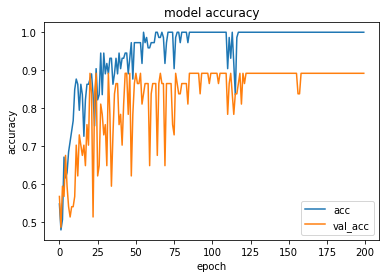

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [8]:
# テストデータに適用
predict_classes = model.predict_classes(X_test)

# マージ。yのデータは元に戻す
mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})

# confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])


37/37 [==============================] - ETA: 0s


predict,0,1
class,,
0,14,4
1,0,19


In [11]:
def train_and_evaluate_model(model,data,labels,data_test,labels_test):
# def train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test]):
    model.fit(data, labels, batch_size=32, epochs=30,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
    return model.evaluate(data_test, labels_test, verbose=1)  # Evaluate the trained model on the test set!
#損失値と評価の値を算出している
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
# print(cross_val_score(model, image_list, label_list,cv=kfold)).mean()  
from sklearn.cross_validation import StratifiedKFold
label = np.r_[np.repeat(0,8), np.repeat(1,8)]
skf = StratifiedKFold(label, n_folds=5, shuffle=True)
total_score = 0
rep = 0
print("success")
for i, (train, test) in enumerate(skf):
    print("TRAIN:", train, "TEST:", test)
    total_score += train_and_evaluate_model(model, X_train[train], y_train[train], X_train[test], y_train[test])[1]
    rep+=1
print(total_score/rep)

success
TRAIN: [ 1  2  3  4  5  7  8  9 12 13 14 15] TEST: [ 0  6 10 11]
Train on 10 samples, validate on 2 samples
Epoch 1/30

10/10 [==============================] - ETA: 0s - loss: 9.5566e-05 - acc: 1.0000 - val_loss: 2.8402e-05 - val_acc: 1.0000
Epoch 2/30

10/10 [==============================] - ETA: 0s - loss: 3.9550e-04 - acc: 1.0000 - val_loss: 2.8939e-05 - val_acc: 1.0000
Epoch 3/30

10/10 [==============================] - ETA: 0s - loss: 2.4613e-05 - acc: 1.0000 - val_loss: 2.8968e-05 - val_acc: 1.0000
Epoch 4/30

10/10 [==============================] - ETA: 0s - loss: 1.0421e-04 - acc: 1.0000 - val_loss: 2.9028e-05 - val_acc: 1.0000
Epoch 5/30

10/10 [==============================] - ETA: 0s - loss: 1.3702e-04 - acc: 1.0000 - val_loss: 2.9237e-05 - val_acc: 1.0000
Epoch 6/30

10/10 [==============================] - ETA: 0s - loss: 6.5163e-05 - acc: 1.0000 - val_loss: 2.9266e-05 - val_acc: 1.0000
Epoch 7/30

10/10 [==============================] - ETA: 0s - loss: 3.435

Epoch 30/30

10/10 [==============================] - ETA: 0s - loss: 1.1161e-04 - acc: 1.0000 - val_loss: 3.7939e-05 - val_acc: 1.0000

4/4 [==============================] - ETA: 0s
TRAIN: [ 0  1  2  4  6  7  8 10 11 13 14 15] TEST: [ 3  5  9 12]
Train on 10 samples, validate on 2 samples
Epoch 1/30

10/10 [==============================] - ETA: 0s - loss: 1.0625e-04 - acc: 1.0000 - val_loss: 2.1160e-05 - val_acc: 1.0000
Epoch 2/30

10/10 [==============================] - ETA: 0s - loss: 4.6904e-05 - acc: 1.0000 - val_loss: 2.1160e-05 - val_acc: 1.0000
Epoch 3/30

10/10 [==============================] - ETA: 0s - loss: 1.9051e-05 - acc: 1.0000 - val_loss: 2.1190e-05 - val_acc: 1.0000
Epoch 4/30

10/10 [==============================] - ETA: 0s - loss: 1.2044e-04 - acc: 1.0000 - val_loss: 2.1279e-05 - val_acc: 1.0000
Epoch 5/30

10/10 [==============================] - ETA: 0s - loss: 3.5200e-05 - acc: 1.0000 - val_loss: 2.1279e-05 - val_acc: 1.0000
Epoch 6/30

10/10 [==============

Epoch 29/30

12/12 [==============================] - ETA: 0s - loss: 2.2164e-05 - acc: 1.0000 - val_loss: 2.6763e-05 - val_acc: 1.0000
Epoch 30/30

12/12 [==============================] - ETA: 0s - loss: 6.8553e-05 - acc: 1.0000 - val_loss: 2.6674e-05 - val_acc: 1.0000

2/2 [==============================] - ETA: 0s
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14] TEST: [ 7 15]
Train on 12 samples, validate on 2 samples
Epoch 1/30

12/12 [==============================] - ETA: 0s - loss: 3.2773e-04 - acc: 1.0000 - val_loss: 2.1607e-05 - val_acc: 1.0000
Epoch 2/30

12/12 [==============================] - ETA: 0s - loss: 2.0818e-05 - acc: 1.0000 - val_loss: 2.1607e-05 - val_acc: 1.0000
Epoch 3/30

12/12 [==============================] - ETA: 0s - loss: 3.3402e-05 - acc: 1.0000 - val_loss: 2.1577e-05 - val_acc: 1.0000
Epoch 4/30

12/12 [==============================] - ETA: 0s - loss: 7.7208e-05 - acc: 1.0000 - val_loss: 2.1577e-05 - val_acc: 1.0000
Epoch 5/30

12/12 [=============